In [31]:
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pylab

In [12]:
!pip3 install scipy


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [15]:
!pip3 install control


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [143]:
from scipy.signal import lfilter
from scipy.signal import TransferFunction
from scipy.signal import ZerosPolesGain
from scipy.signal import sawtooth
from scipy.signal import freqz
from control.matlab import *

# Задание 1
**запишите передаточную функцию и найдите нули и полюса фильтра, которыйзадан в виде блок-схемы (рис. 2.11). Значения а1, а2, b0, b1 и b2 выберите из табл. 2.2.**
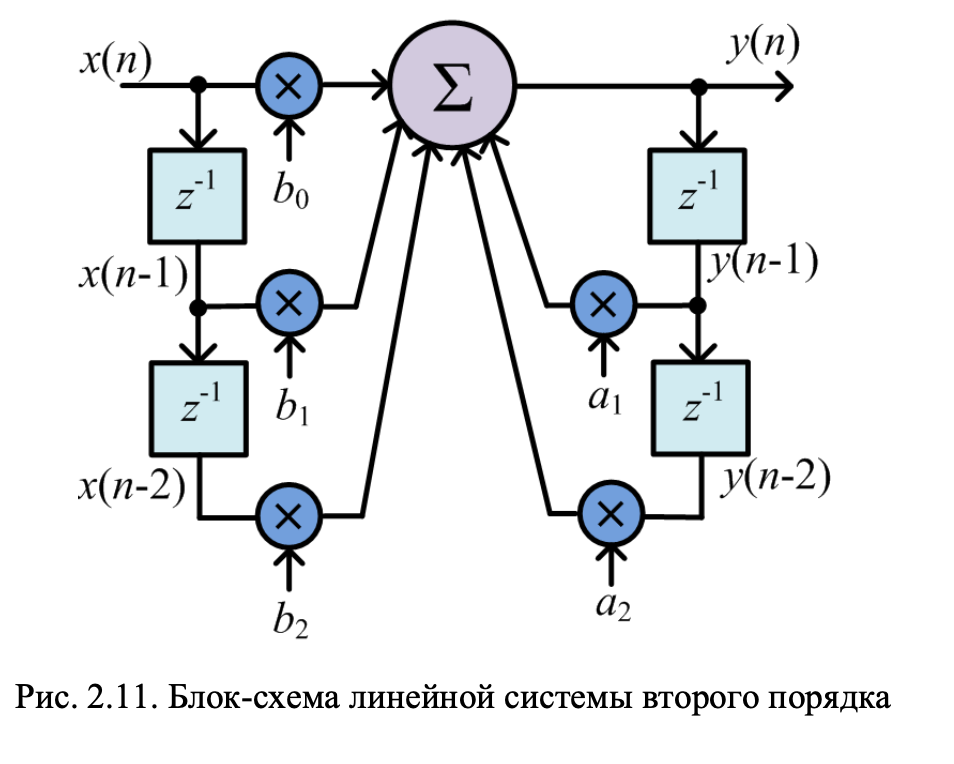

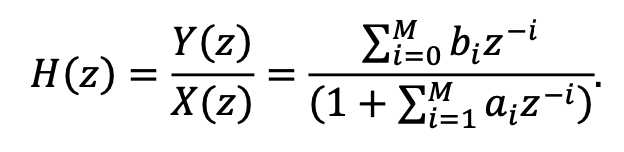

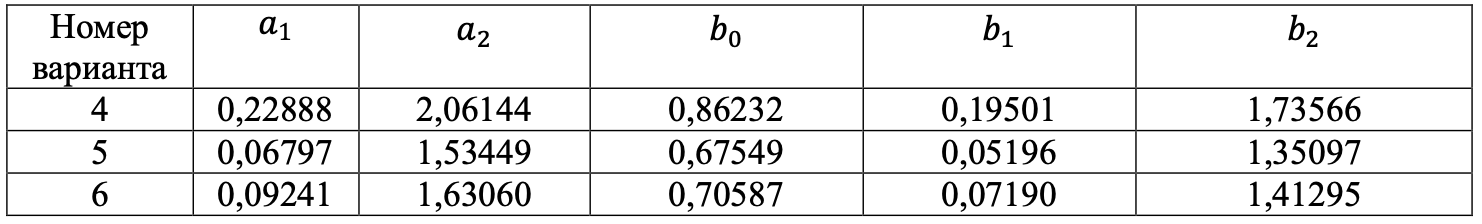

In [24]:
b = [0.86232, 0.19501, 1.73566]
a = [1, 0.22888, 2.06144]

In [27]:
sys = tf(b, a)
z = zero(sys)
p = pole(sys)
print(f'Нули = \n{z[0]}\n{z[1]}\nПолюса = \n{p[0]}\n{p[1]}')

Нули = 
(-0.11307287317933018+1.4142114424536374j)
(-0.11307287317933018-1.4142114424536374j)
Полюса = 
(-0.11444000000000001+1.4312035097776976j)
(-0.11444000000000001-1.4312035097776976j)


# Задание 2
Напишите функцию, реализующую разностное уравнение (2.1). Навход функции поступают коэффициенты {bi},{ai} и входной сигнал x[n]. 
С помощью написанной функции постройте импульсную характеристику для фильтра из задания 2.2.1. Сравните результат с работой функции filter.
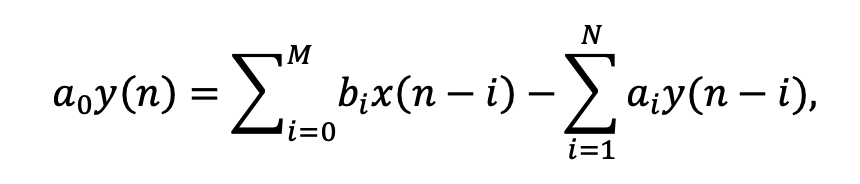

In [51]:
def myLfilter(b, a, x):
    y = np.zeros(len(x))
    y[0] = b[0] * x[0]
    for n in range(1, len(x)):
        for i in range(1, len(b)):
            if (n - i + 1):
                y[n] += b[i] * x[n - i]
        for i in range(1, len(b)):
            if (n - i + 1):
                y[n] -= b[i] * y[n - i]
    y *= -1
    y[0] *= -1
    return y

In [52]:
N = np.arange(0, 64, 1, dtype=int)
x = np.concatenate((np.array([1, 1, 1]), np.zeros(61)))
y_orig = lfilter(b, a, x)
y_my = myLfilter(b, a, x)

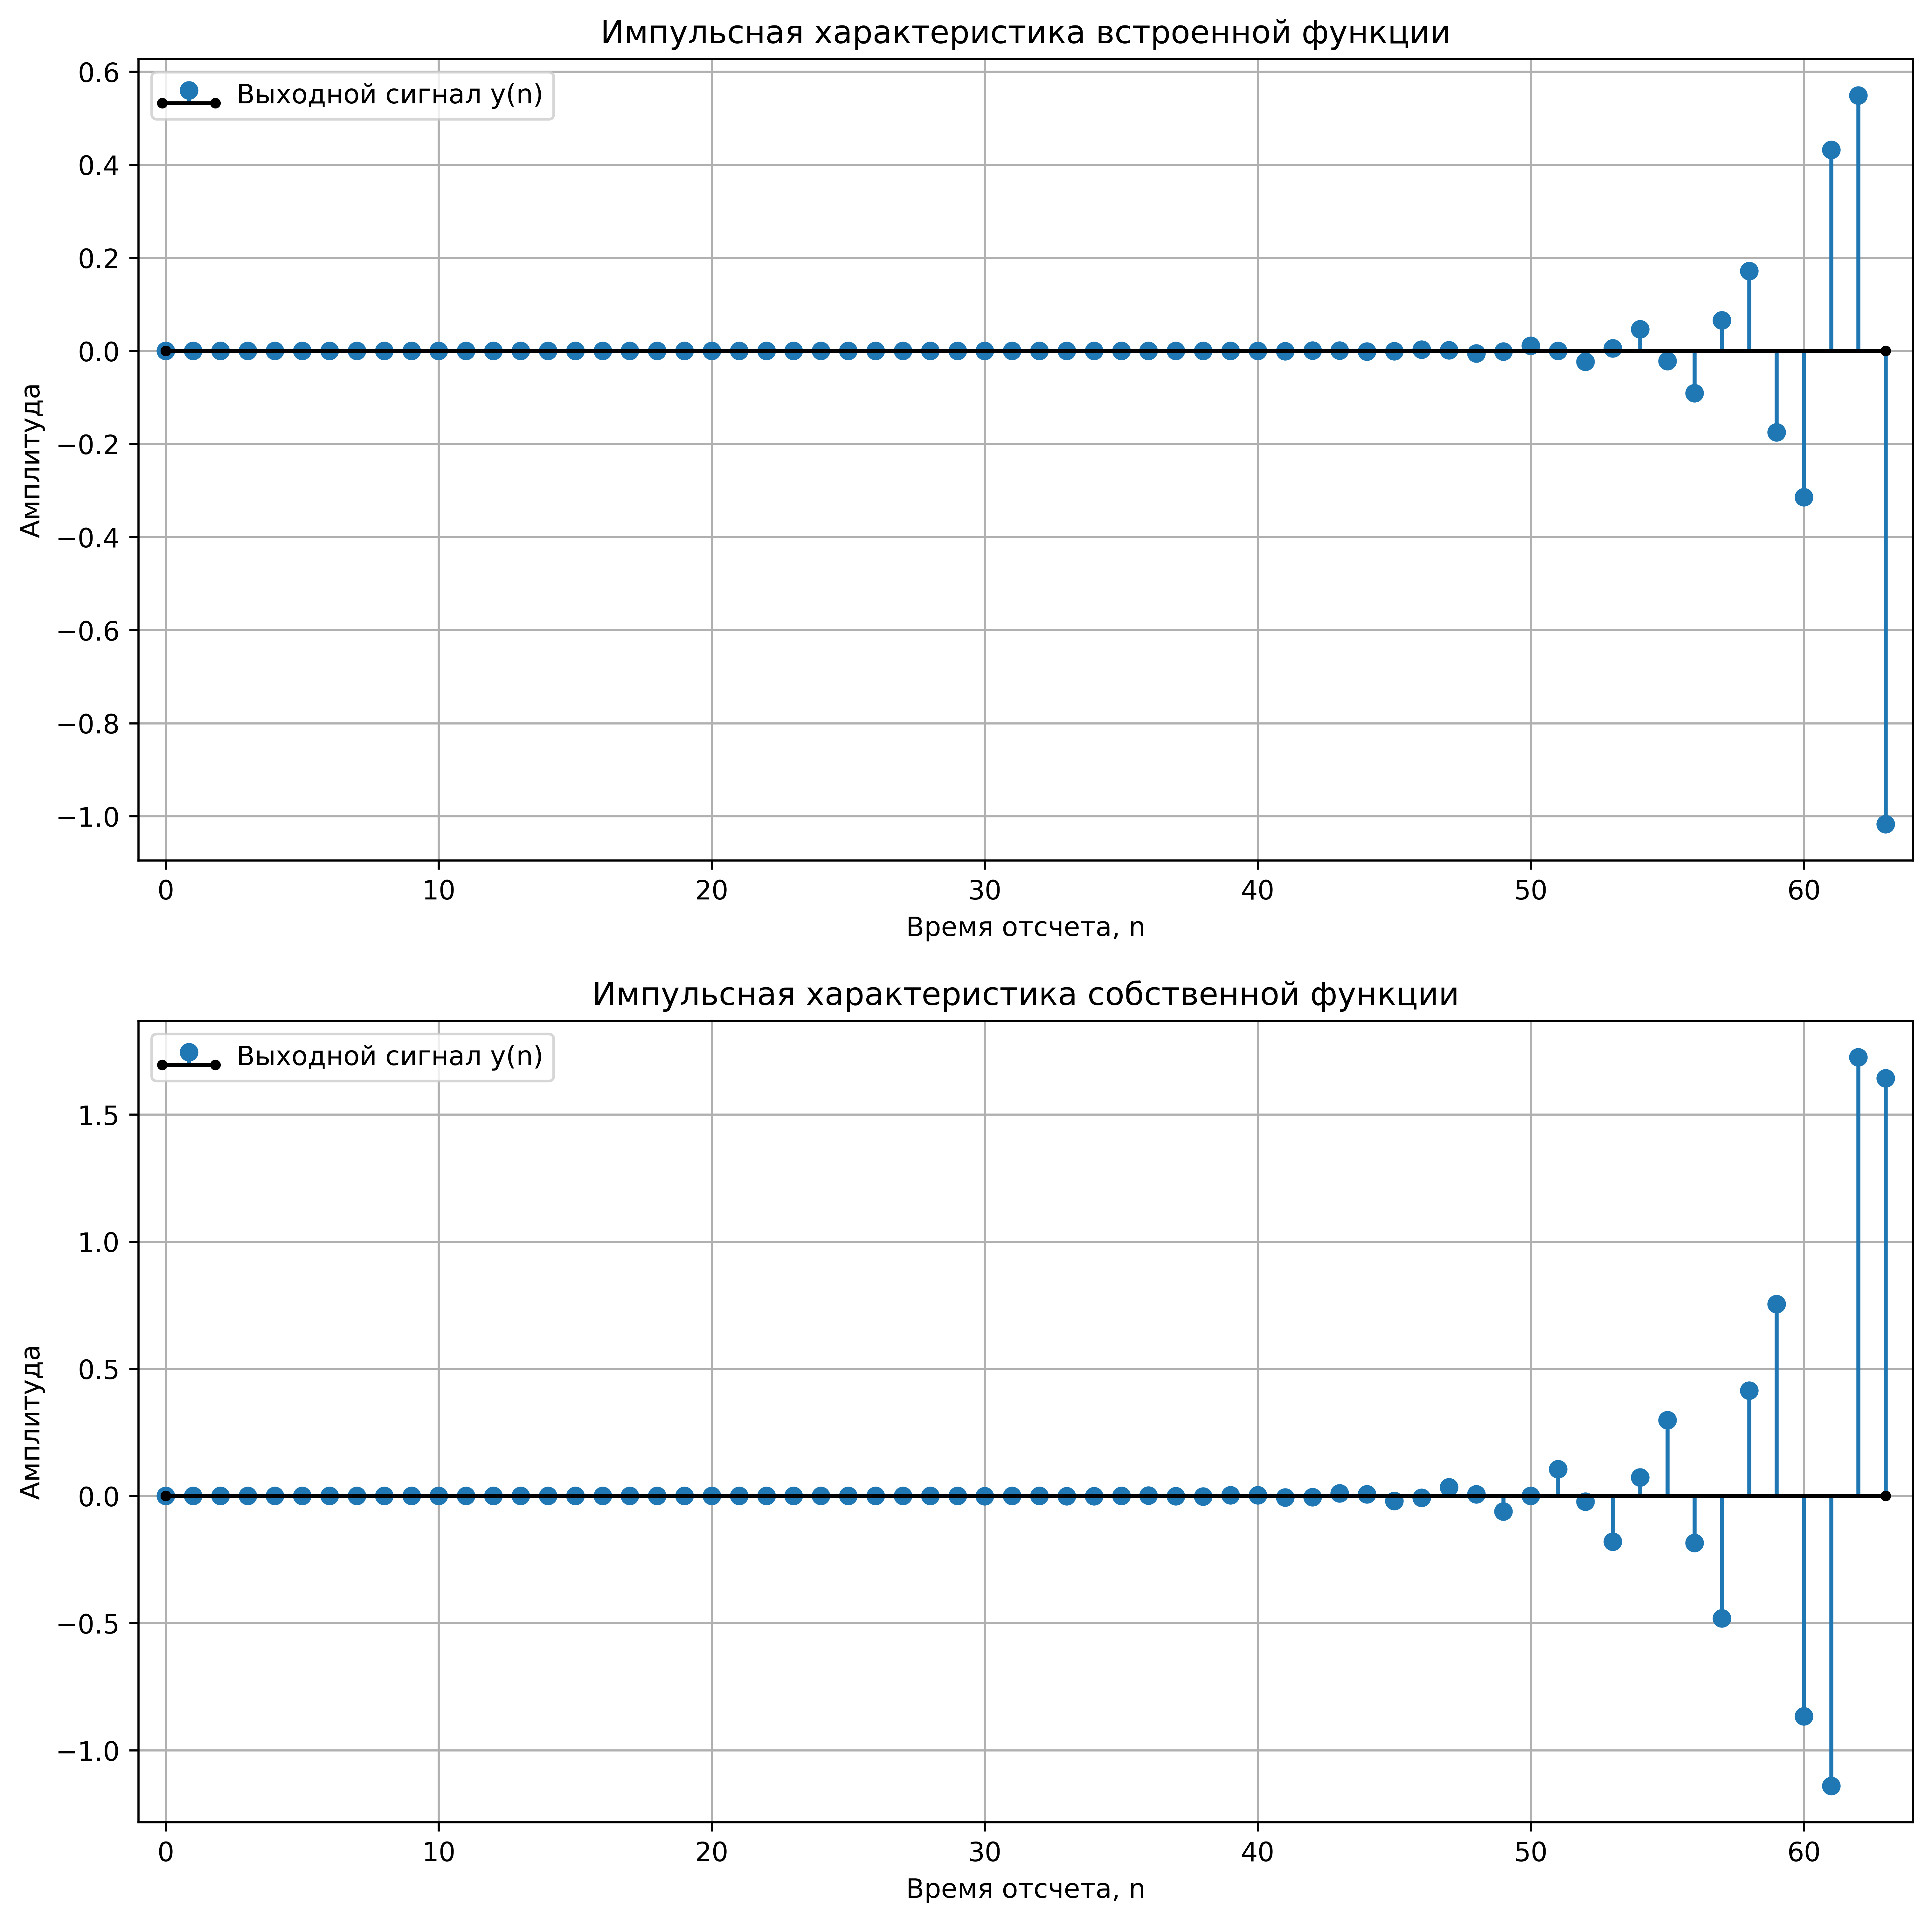

In [91]:
pylab.figure(figsize=(12.0, 12.0), dpi=600)
pylab.subplot(2, 1, 1)
pylab.stem(N, y_orig/1e8, label='Выходной сигнал y(n)', basefmt='.-k') #, marker='o', linestyle='--', color='b', linewidth=0.5, label='Выходной сигнал y(n)')
pylab.grid()
pylab.xlim((-1, 64))
pylab.xscale('linear')
pylab.xlabel('Время отсчета, n')
pylab.ylabel('Амплитуда')
pylab.title('Импульсная характеристика встроенной функции')
pylab.legend()
pylab.subplot(2, 1, 2)
pylab.stem(N, y_my/1e7, label='Выходной сигнал y(n)', basefmt='.-k') #marker='o', linestyle='--', color='b', linewidth=0.5, label='Выходной сигнал y(n)')
pylab.grid()
pylab.xlim((-1, 64))
pylab.xscale('linear')
pylab.xlabel('Время отсчета, n')
pylab.ylabel('Амплитуда')
pylab.title('Импульсная характеристика собственной функции')
pylab.legend()
pylab.savefig('impulse.png', dpi = 600)
pylab.show()

# Задание 3
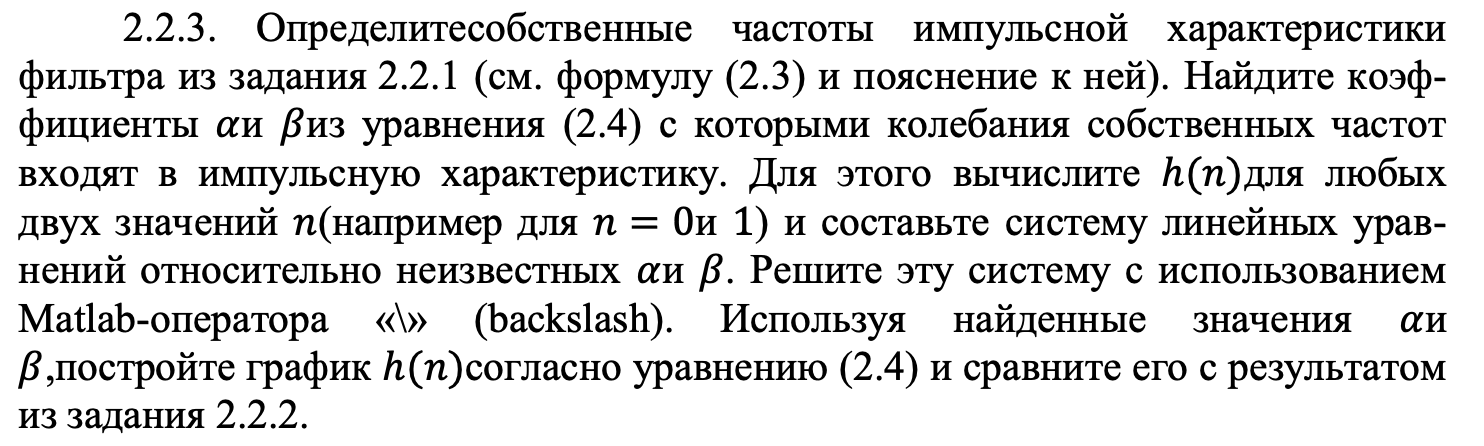
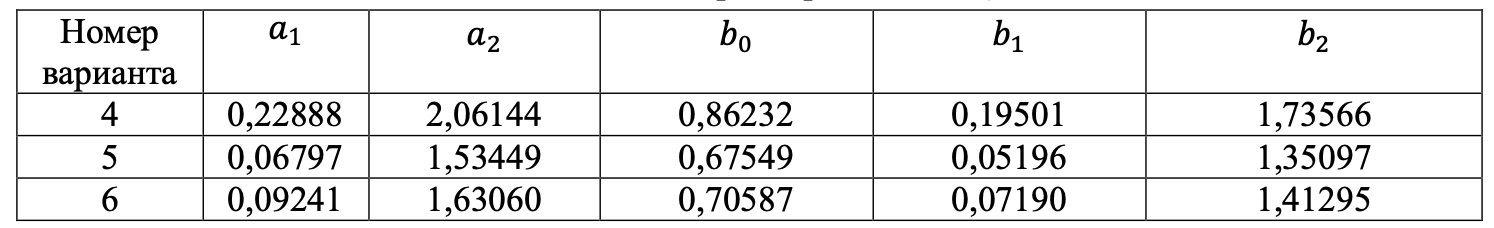

In [83]:
freq = np.roots(a)
freq = [np.sqrt(freq[0].real ** 2 + freq[0].imag ** 2), -np.sqrt(freq[1].real ** 2 + freq[1].imag ** 2)]
print(freq)

[1.435771569575049, -1.435771569575049]


In [89]:
A = np.array([1, 1, freq[0], freq[1]])
print(A)
B = np.array(np.mat(f'{b[0]}; -0.0024'))
print(B)
res_AB = A / B
print(res_AB)
H = (res_AB[0][0] * res_AB[0][1] * res_AB[0][2] * res_AB[0][3]) * freq[0] ** N + (res_AB[1][0] * res_AB[1][1] * res_AB[1][2] * res_AB[1][3]) * freq[1] ** N

[ 1.          1.          1.43577157 -1.43577157]
[[ 0.86232]
 [-0.0024 ]]
[[   1.15966231    1.15966231    1.66501017   -1.66501017]
 [-416.66666667 -416.66666667 -598.23815399  598.23815399]]


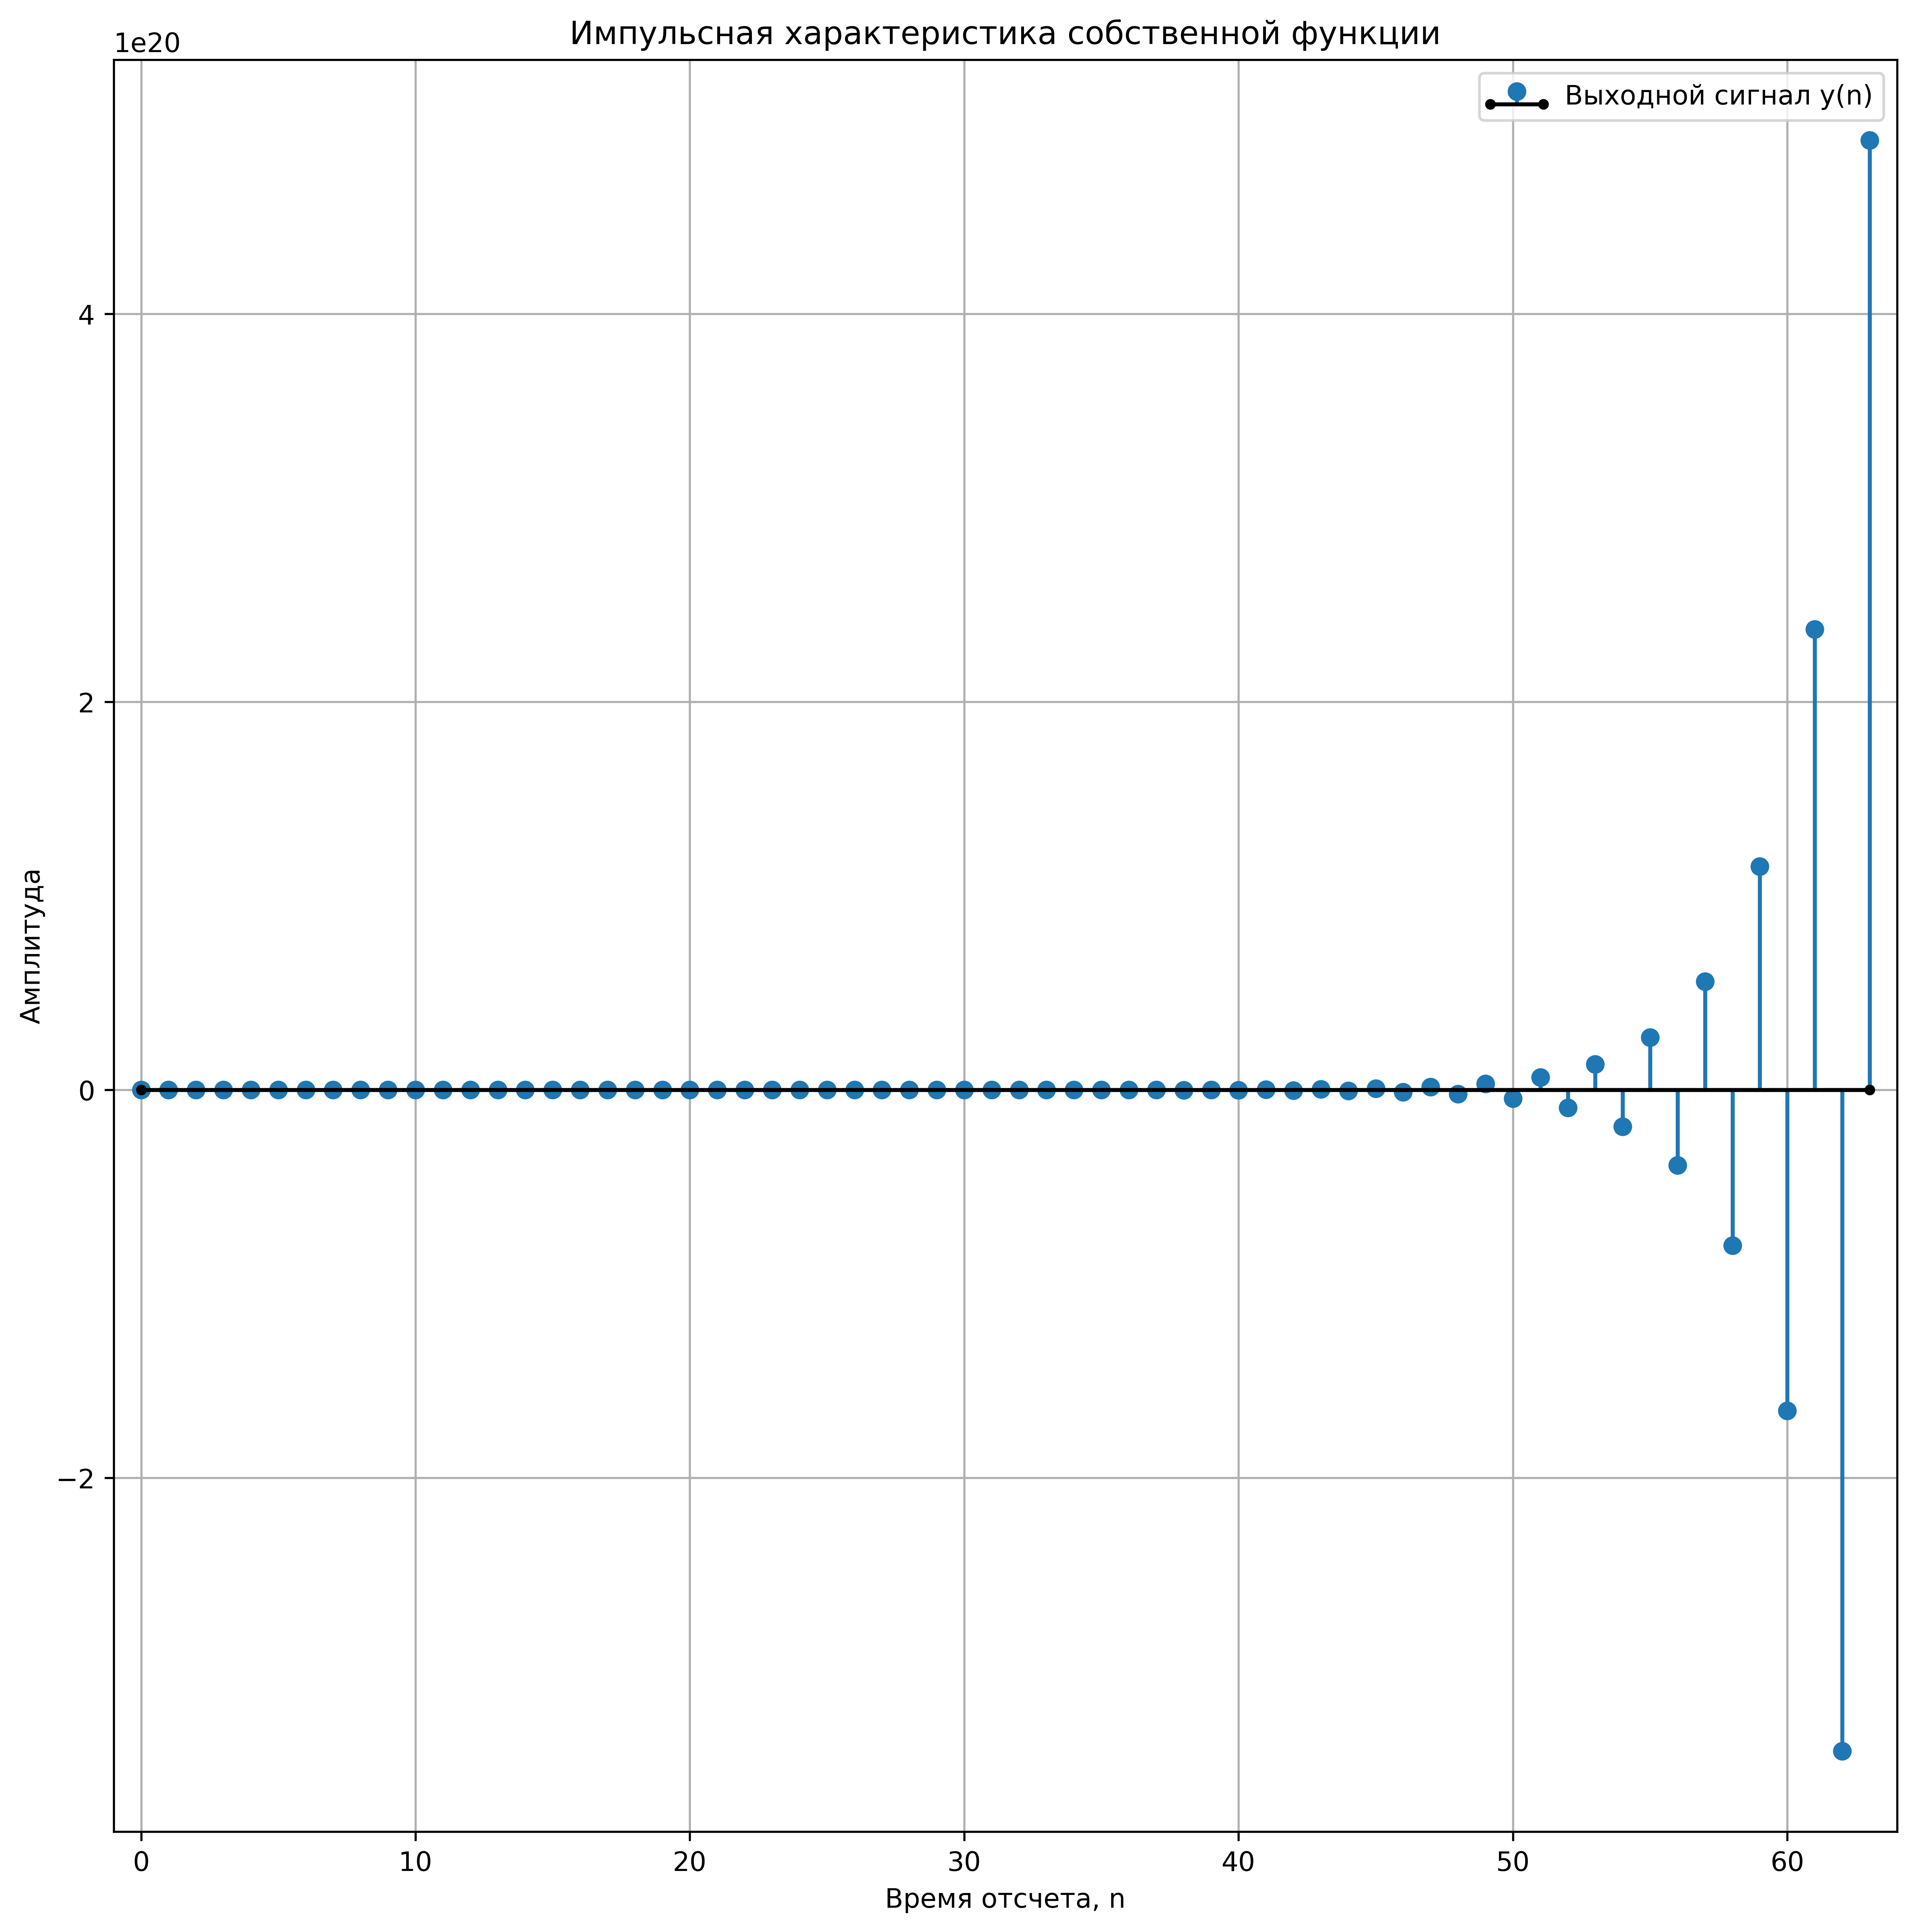

In [92]:
pylab.figure(figsize=(12.0, 12.0), dpi=600)
pylab.stem(N, H, label='Выходной сигнал y(n)', basefmt='.-k') #marker='o', linestyle='--', color='b', linewidth=0.5, label='Выходной сигнал y(n)')
pylab.grid()
pylab.xlim((-1, 64))
pylab.xscale('linear')
pylab.xlabel('Время отсчета, n')
pylab.ylabel('Амплитуда')
pylab.title('Импульсная характеристика собственной функции')
pylab.legend()
pylab.savefig('new_impulse.png', dpi = 600)
pylab.show()

# Задание 4
Найдите отклик фильтра из задания 2.2.1 при воздействии на вход единичного скачка x(n)=u(n−n0), n=1...N. Выбрав достаточное значение
N, определите, к какому значению сходится выходной сигнал фильтра. Это значение называют устоявшимся режимом фильтра, а переменную часть характеристики – переходной характеристикой. В качестве n0 возьмите номер своего варианта (т.е. если выполняете вариант 2, то n0 =2).

In [101]:
n0 = 4
N0 = np.arange(0, 20, 1, dtype=int)
N1 = np.arange(0, 200, 1, dtype=int)

In [102]:
def response(n0, N, i):
    global a, b
    first = np.zeros(n0)
    second = np.ones(len(N) - n0)
    _x = np.concatenate((first, second))
    _y = lfilter(b, a, _x)
    pylab.subplot(2, 2, i)
    pylab.stem(N, _x, basefmt='.-k')
    pylab.grid()
    pylab.title(f'x(n - 4), N = {len(N)}')
    pylab.subplot(2, 2, (i + 1))
    pylab.stem(N, _y, basefmt='.-k')
    pylab.grid()
    pylab.title(f'y(n), N = {len(N)}')

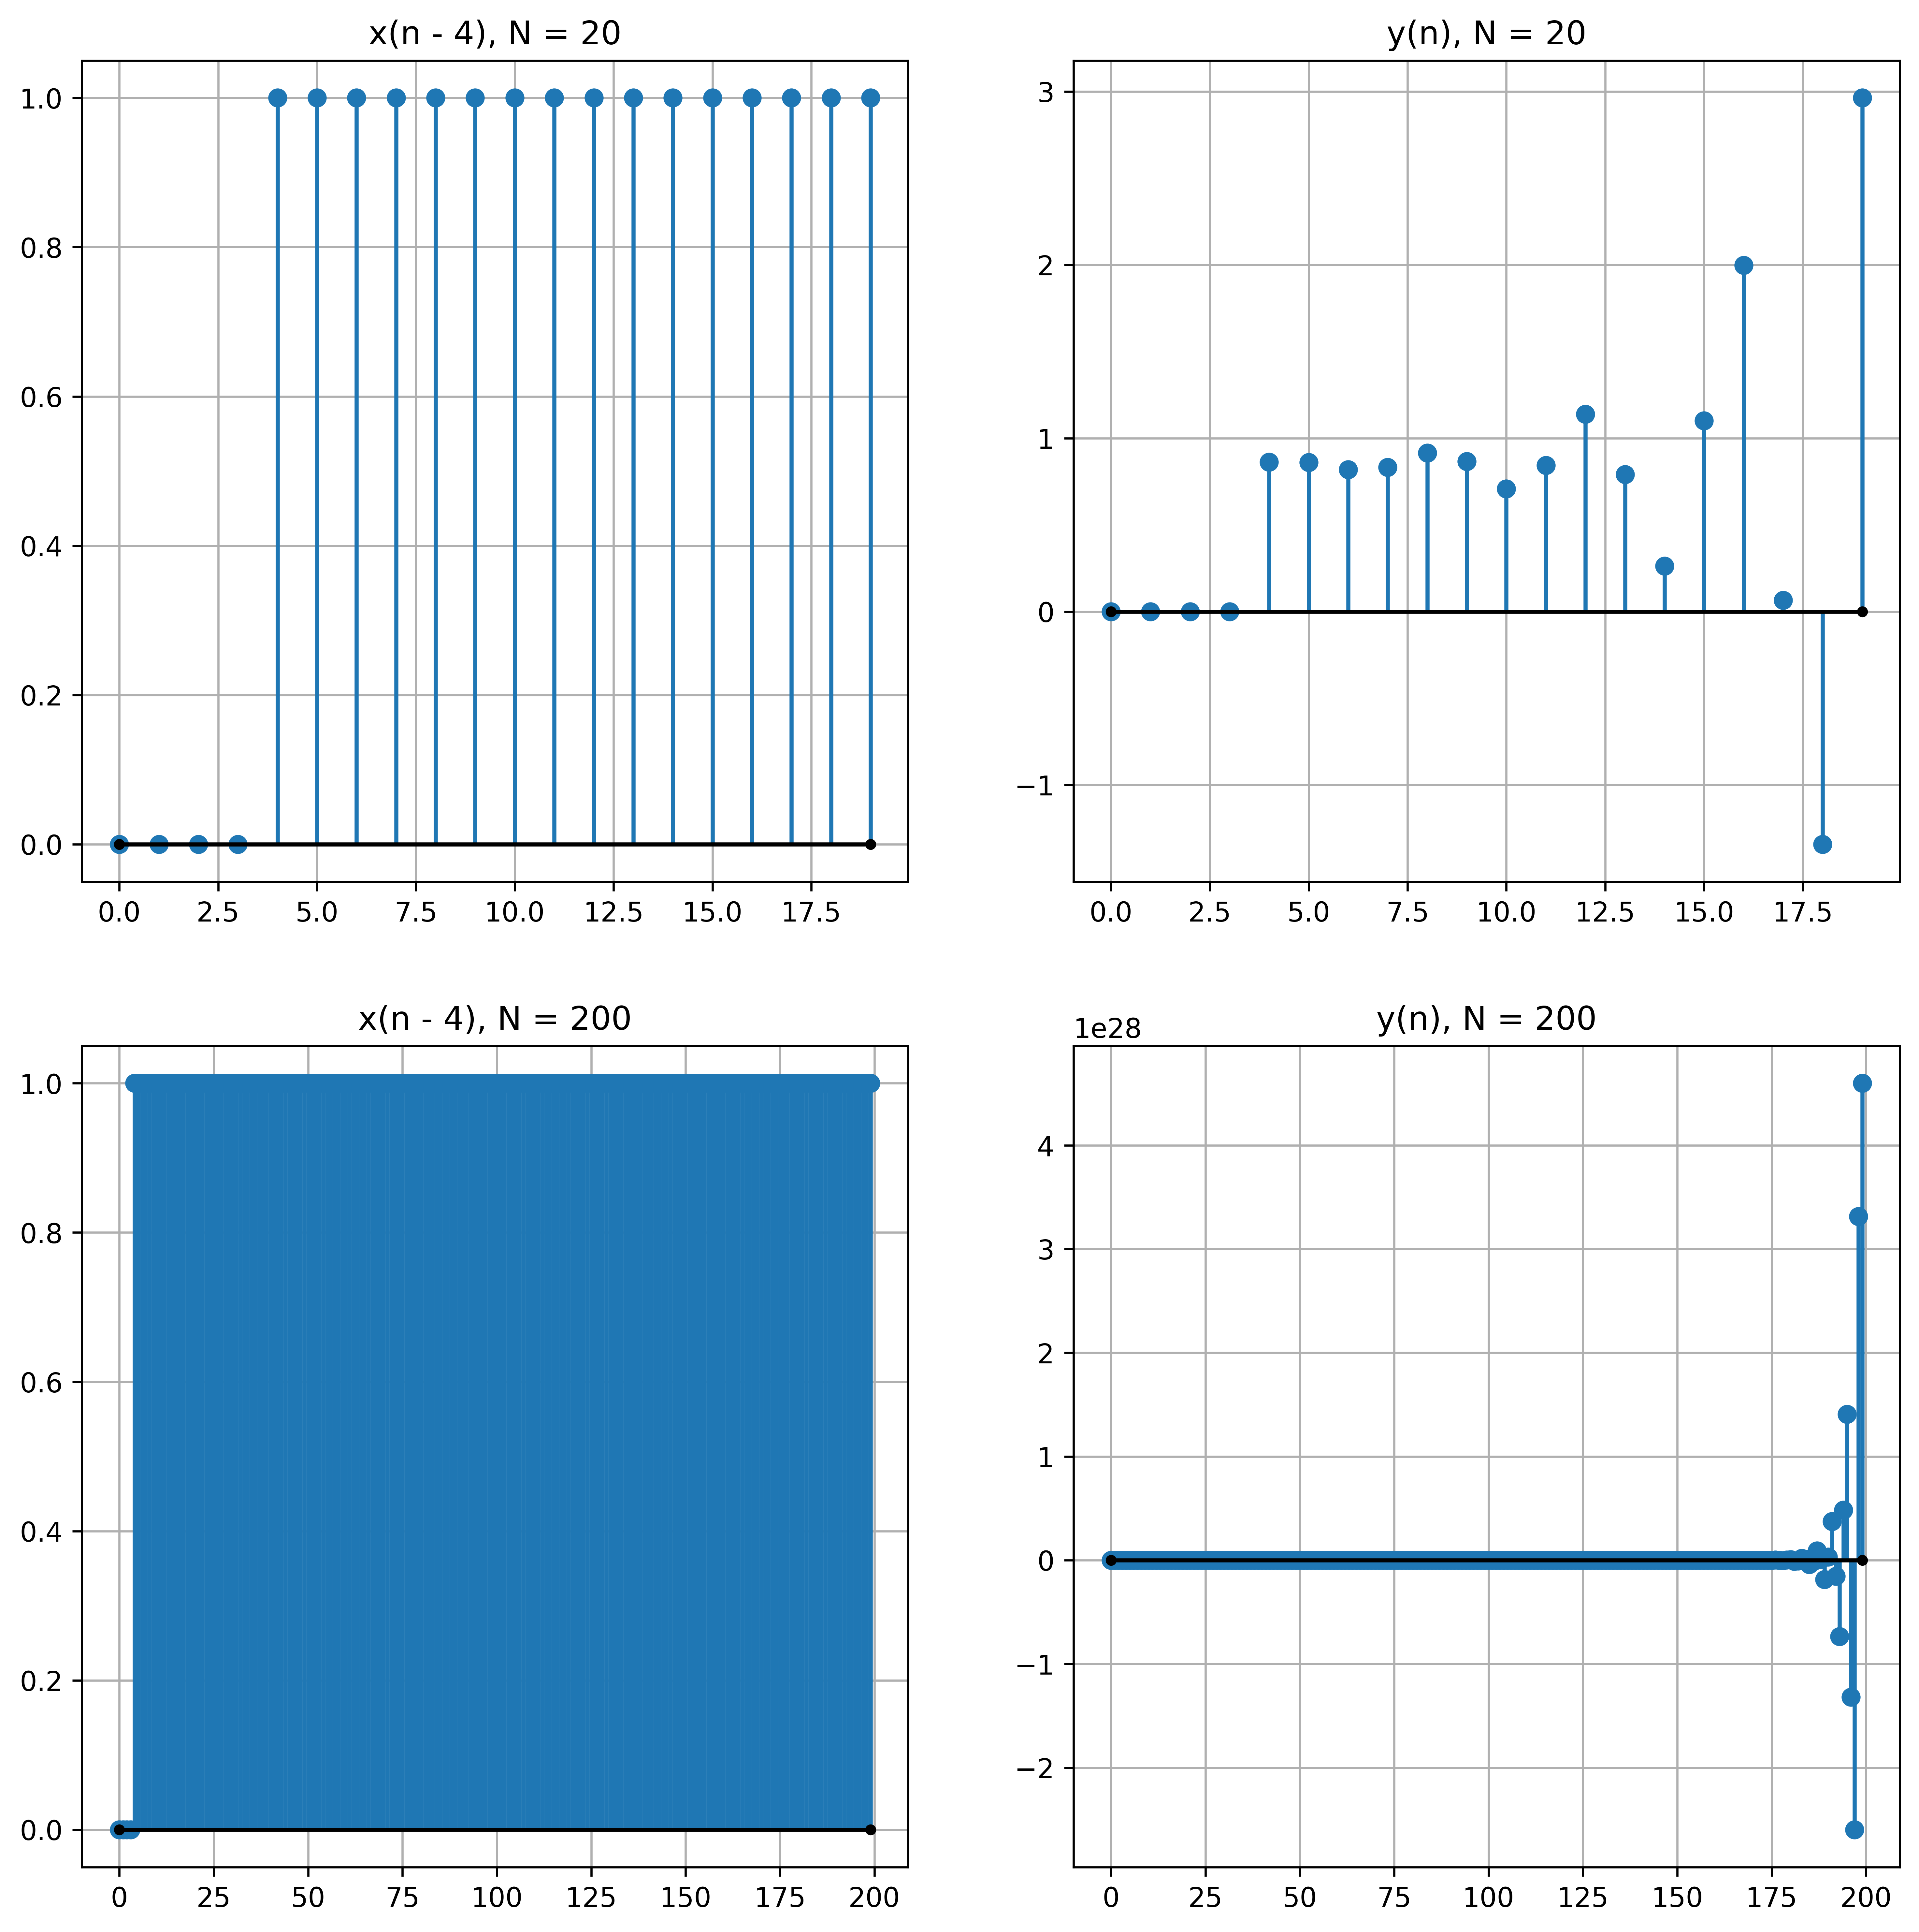

In [103]:
pylab.figure(figsize=(12.0, 12.0), dpi=600)
response(n0, N0, 1)
response(n0, N1, 3)
pylab.savefig('N_system.png', dpi=600)
pylab.show()

# Задание 5
Вычислите отклик фильтра на следующие сигналы (табл.ица 2.3)
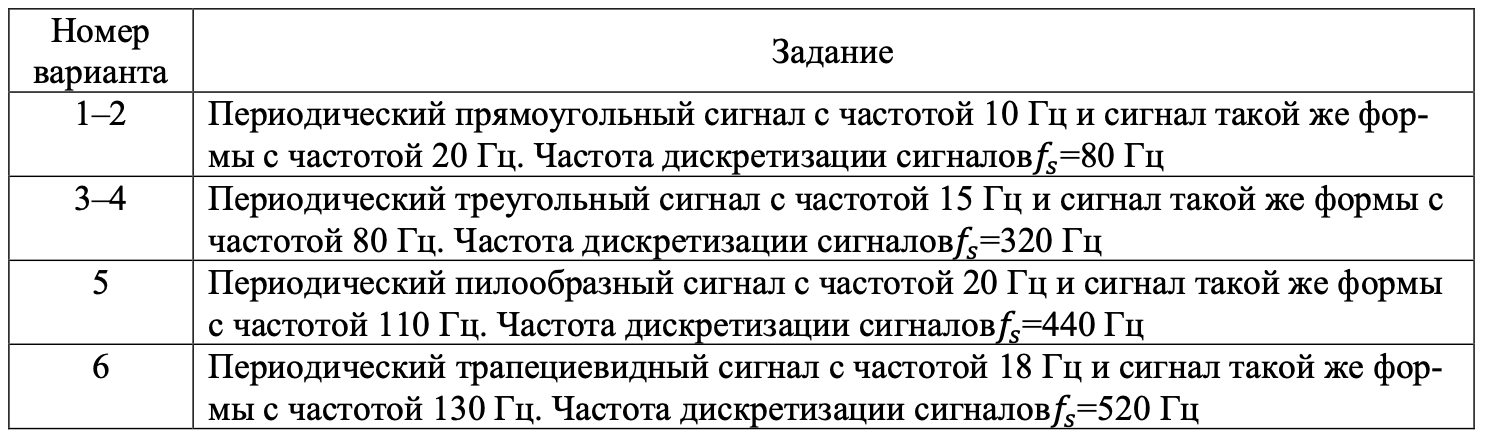

In [139]:
f = [15, 80]
f_s = 320
duration = 0.07
t = (np.linspace(0, 7, (7 * f_s)) / 100)
saw_sig0 = sawtooth(2 * np.pi * f[0] * t)
saw_sig1 = sawtooth(2 * np.pi * f[1] * t)

y_saw_sig0 = lfilter(b, a, saw_sig0)
x_saw_sig0 = np.arange(0, len(y_saw_sig0), 1, dtype=int)

y_saw_sig1 = lfilter(b, a, saw_sig1)
x_saw_sig1 = np.arange(0, len(y_saw_sig1), 1, dtype=int)

size = len(x_saw_sig0)

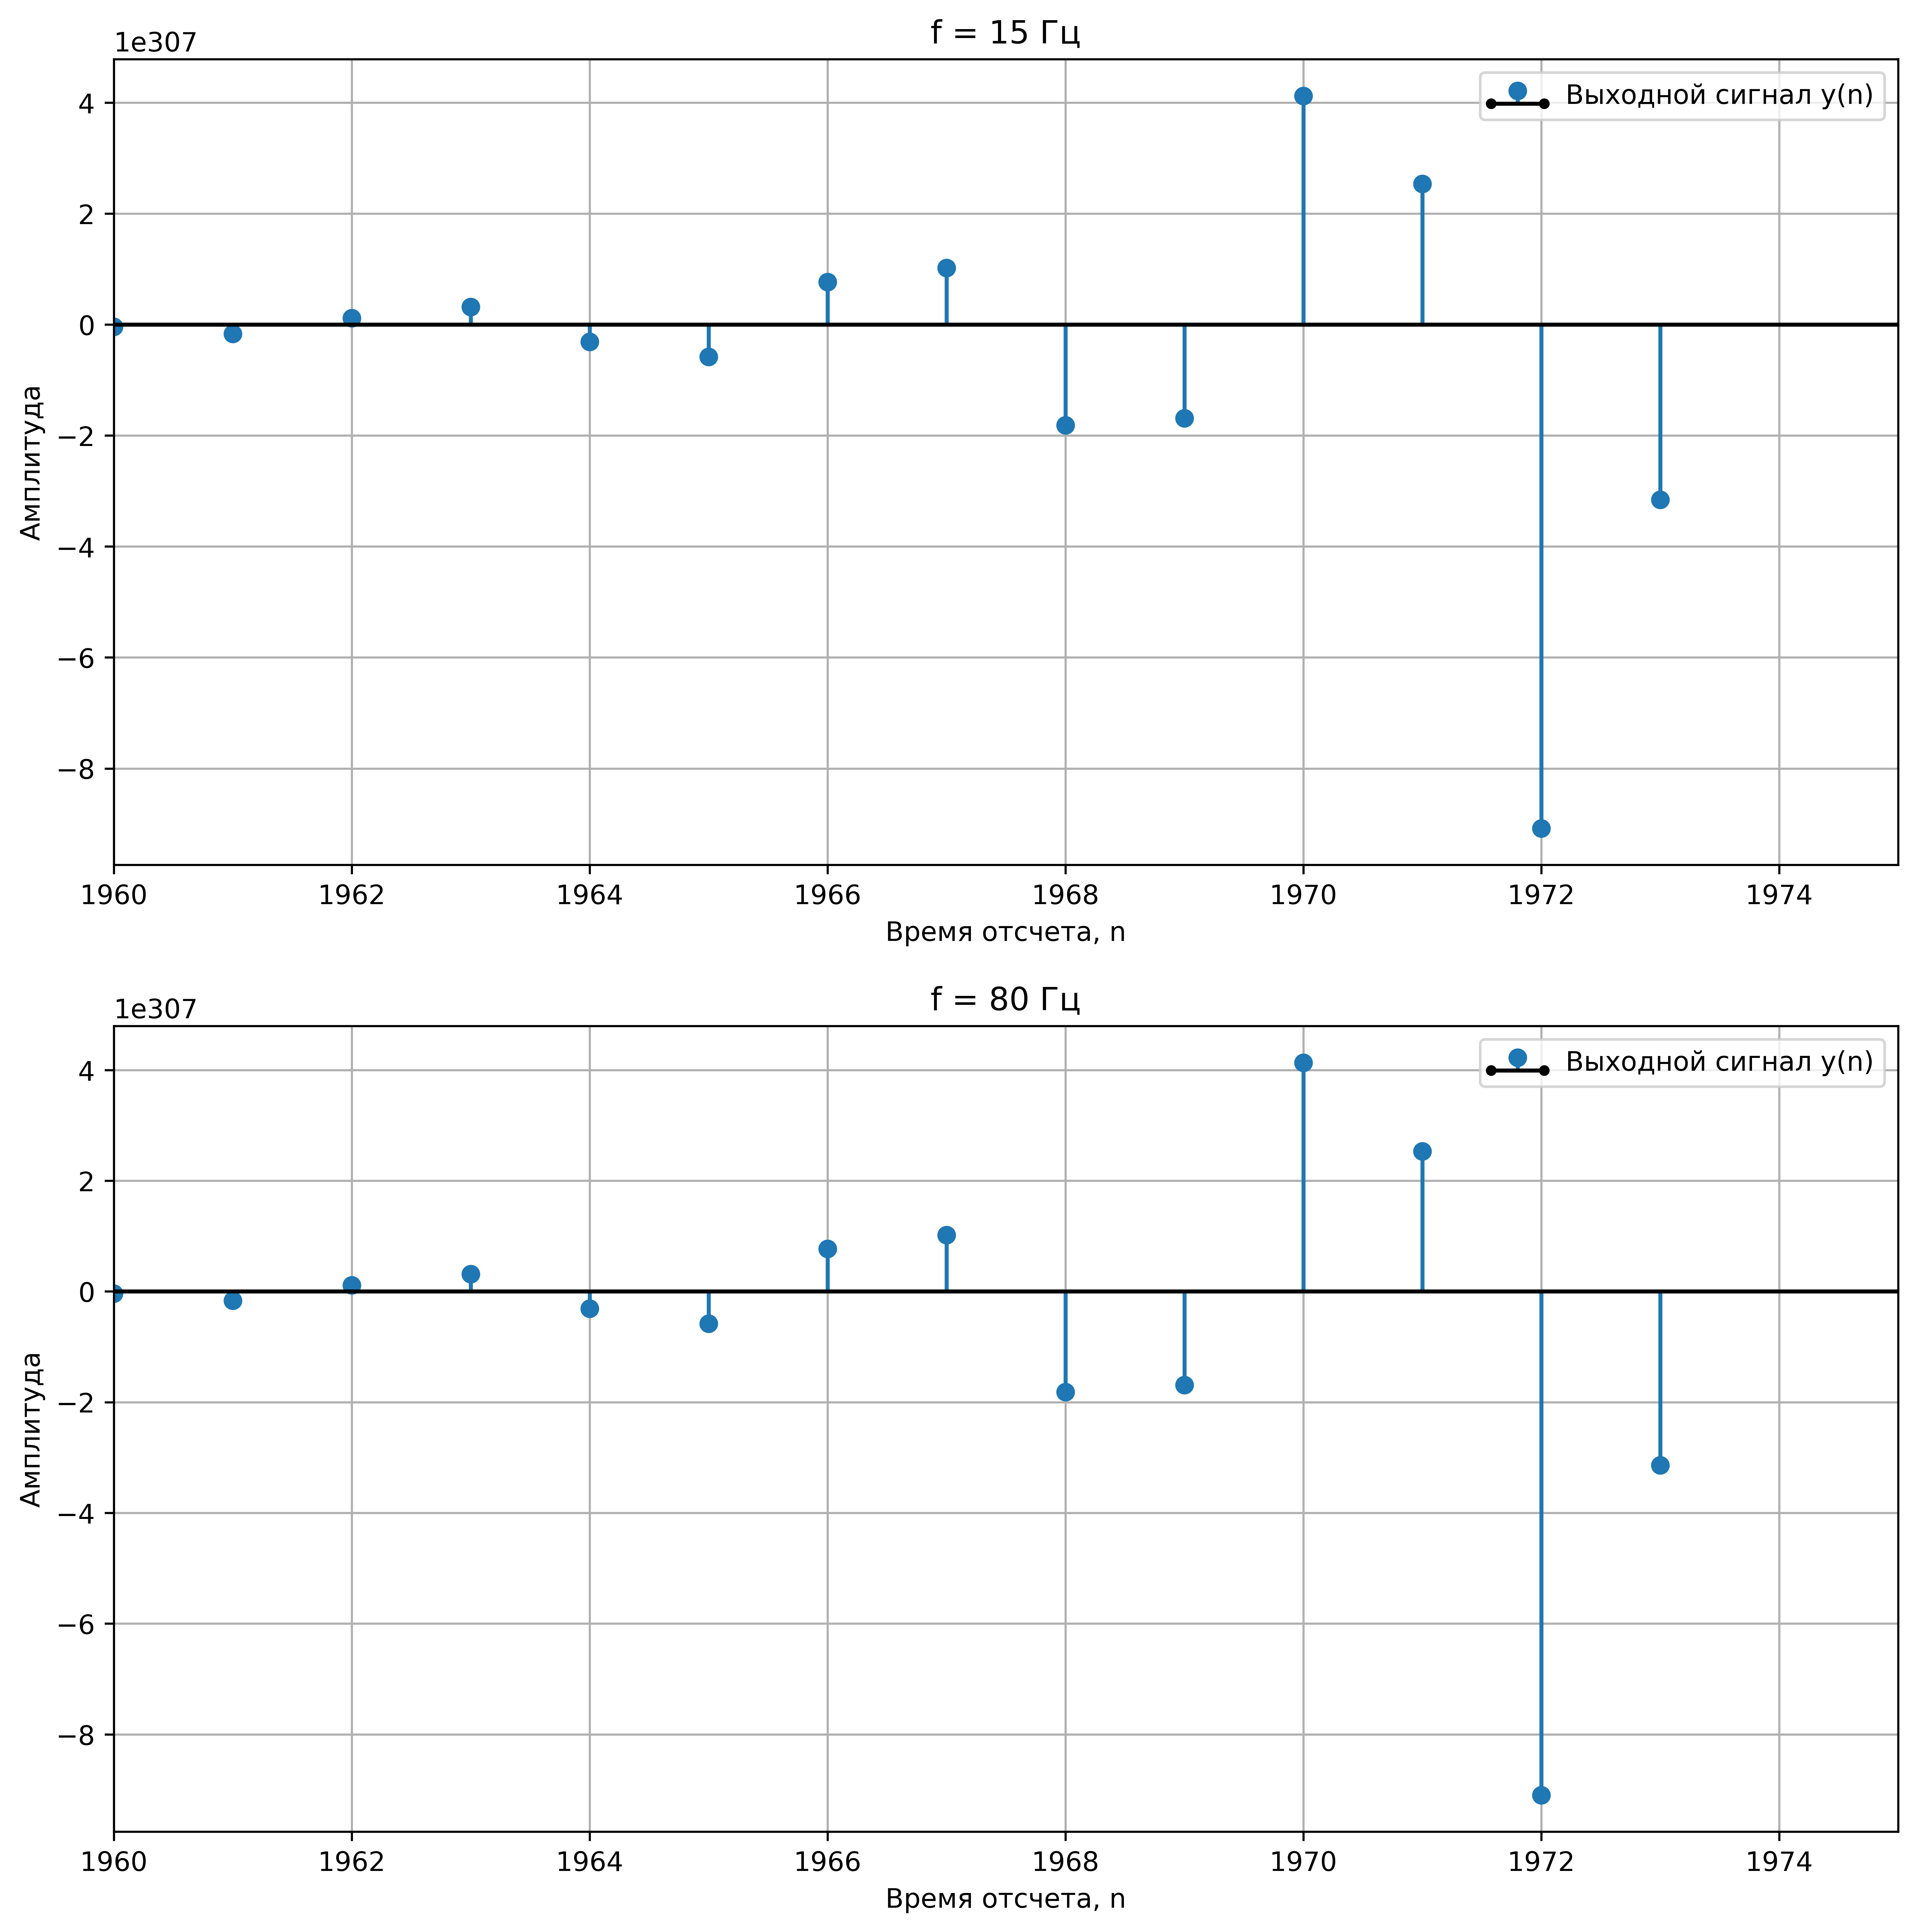

In [140]:
pylab.figure(figsize=(12.0, 12.0), dpi=600)
pylab.subplot(2, 1, 1)
pylab.stem(x_saw_sig0, y_saw_sig0, label='Выходной сигнал y(n)', basefmt='.-k') #, marker='o', linestyle='--', color='b', linewidth=0.5, label='Выходной сигнал y(n)')
pylab.grid()
pylab.xlim(((size - 280), (size - 265)))
pylab.xscale('linear')
pylab.xlabel('Время отсчета, n')
pylab.ylabel('Амплитуда')
pylab.title('f = 15 Гц')
pylab.legend()
pylab.subplot(2, 1, 2)
pylab.stem(x_saw_sig1, y_saw_sig1, label='Выходной сигнал y(n)', basefmt='.-k') #marker='o', linestyle='--', color='b', linewidth=0.5, label='Выходной сигнал y(n)')
pylab.grid()
pylab.xlim(((size - 280), (size - 265)))
pylab.xscale('linear')
pylab.xlabel('Время отсчета, n')
pylab.ylabel('Амплитуда')
pylab.title('f = 80 Гц')
pylab.legend()
pylab.savefig('sawtooth.png', dpi=600)
pylab.show()

# Задание 6, 7
Вычислите частотную характеристику линейной системы из задания 2.2.1 по формуле
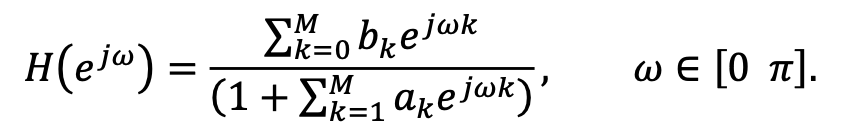

Постройте график 𝐴(𝜔)=|𝐻(𝑒𝑗𝜔)| и 𝜑(𝜔)=arg𝐻(𝑒𝑗𝜔). Функция 𝐴(𝜔) – это амплитудно-частотная характеристика (АЧХ), а 𝜑(𝜔)– фазо-частотная характеристика (ФЧХ). Постройте АЧХ и ФЧХ линейной системы из задания 2.2.1 при помощи функции freqz.

In [194]:
def myfoo(w):
    global a, b
    H = np.zeros(len(w))
    for i in range(1, len(w)):
        num = 0
        for k in range(1, len(b)):
            num += b[k] * np.exp(1j * w[i] * (k))

        det = 1
        for k in range(2, len(a)):
            det += a[k] * np.exp(1j * w[i] * (k))

        H[i] = np.sqrt(num.real ** 2 + num.imag ** 2) / np.sqrt(det.real ** 2 + det.imag ** 2)
    return H

In [195]:
n = 10
w = np.linspace(0, np.pi, n)
H = myfoo(w)
y_6_abs = np.abs(H)
y_6_angle = np.angle(H)

H2 = freqz(b, a, w)
y_7_abs = np.abs(H2)
y_7_angle = np.angle(H2)
print(H2)

(array([0.        , 0.34906585, 0.6981317 , 1.04719755, 1.3962634 ,
       1.74532925, 2.0943951 , 2.44346095, 2.7925268 , 3.14159265]), array([0.84885057+0.00000000e+00j, 0.84851314+3.00710020e-03j,
       0.84720129+6.47096321e-03j, 0.84342459+1.07808217e-02j,
       0.83208098+1.27735145e-02j, 0.8245872 -6.21281199e-03j,
       0.83962196-1.18865823e-02j, 0.84584867-7.43456074e-03j,
       0.84784837-3.43581077e-03j, 0.84833861-1.17254601e-18j]))


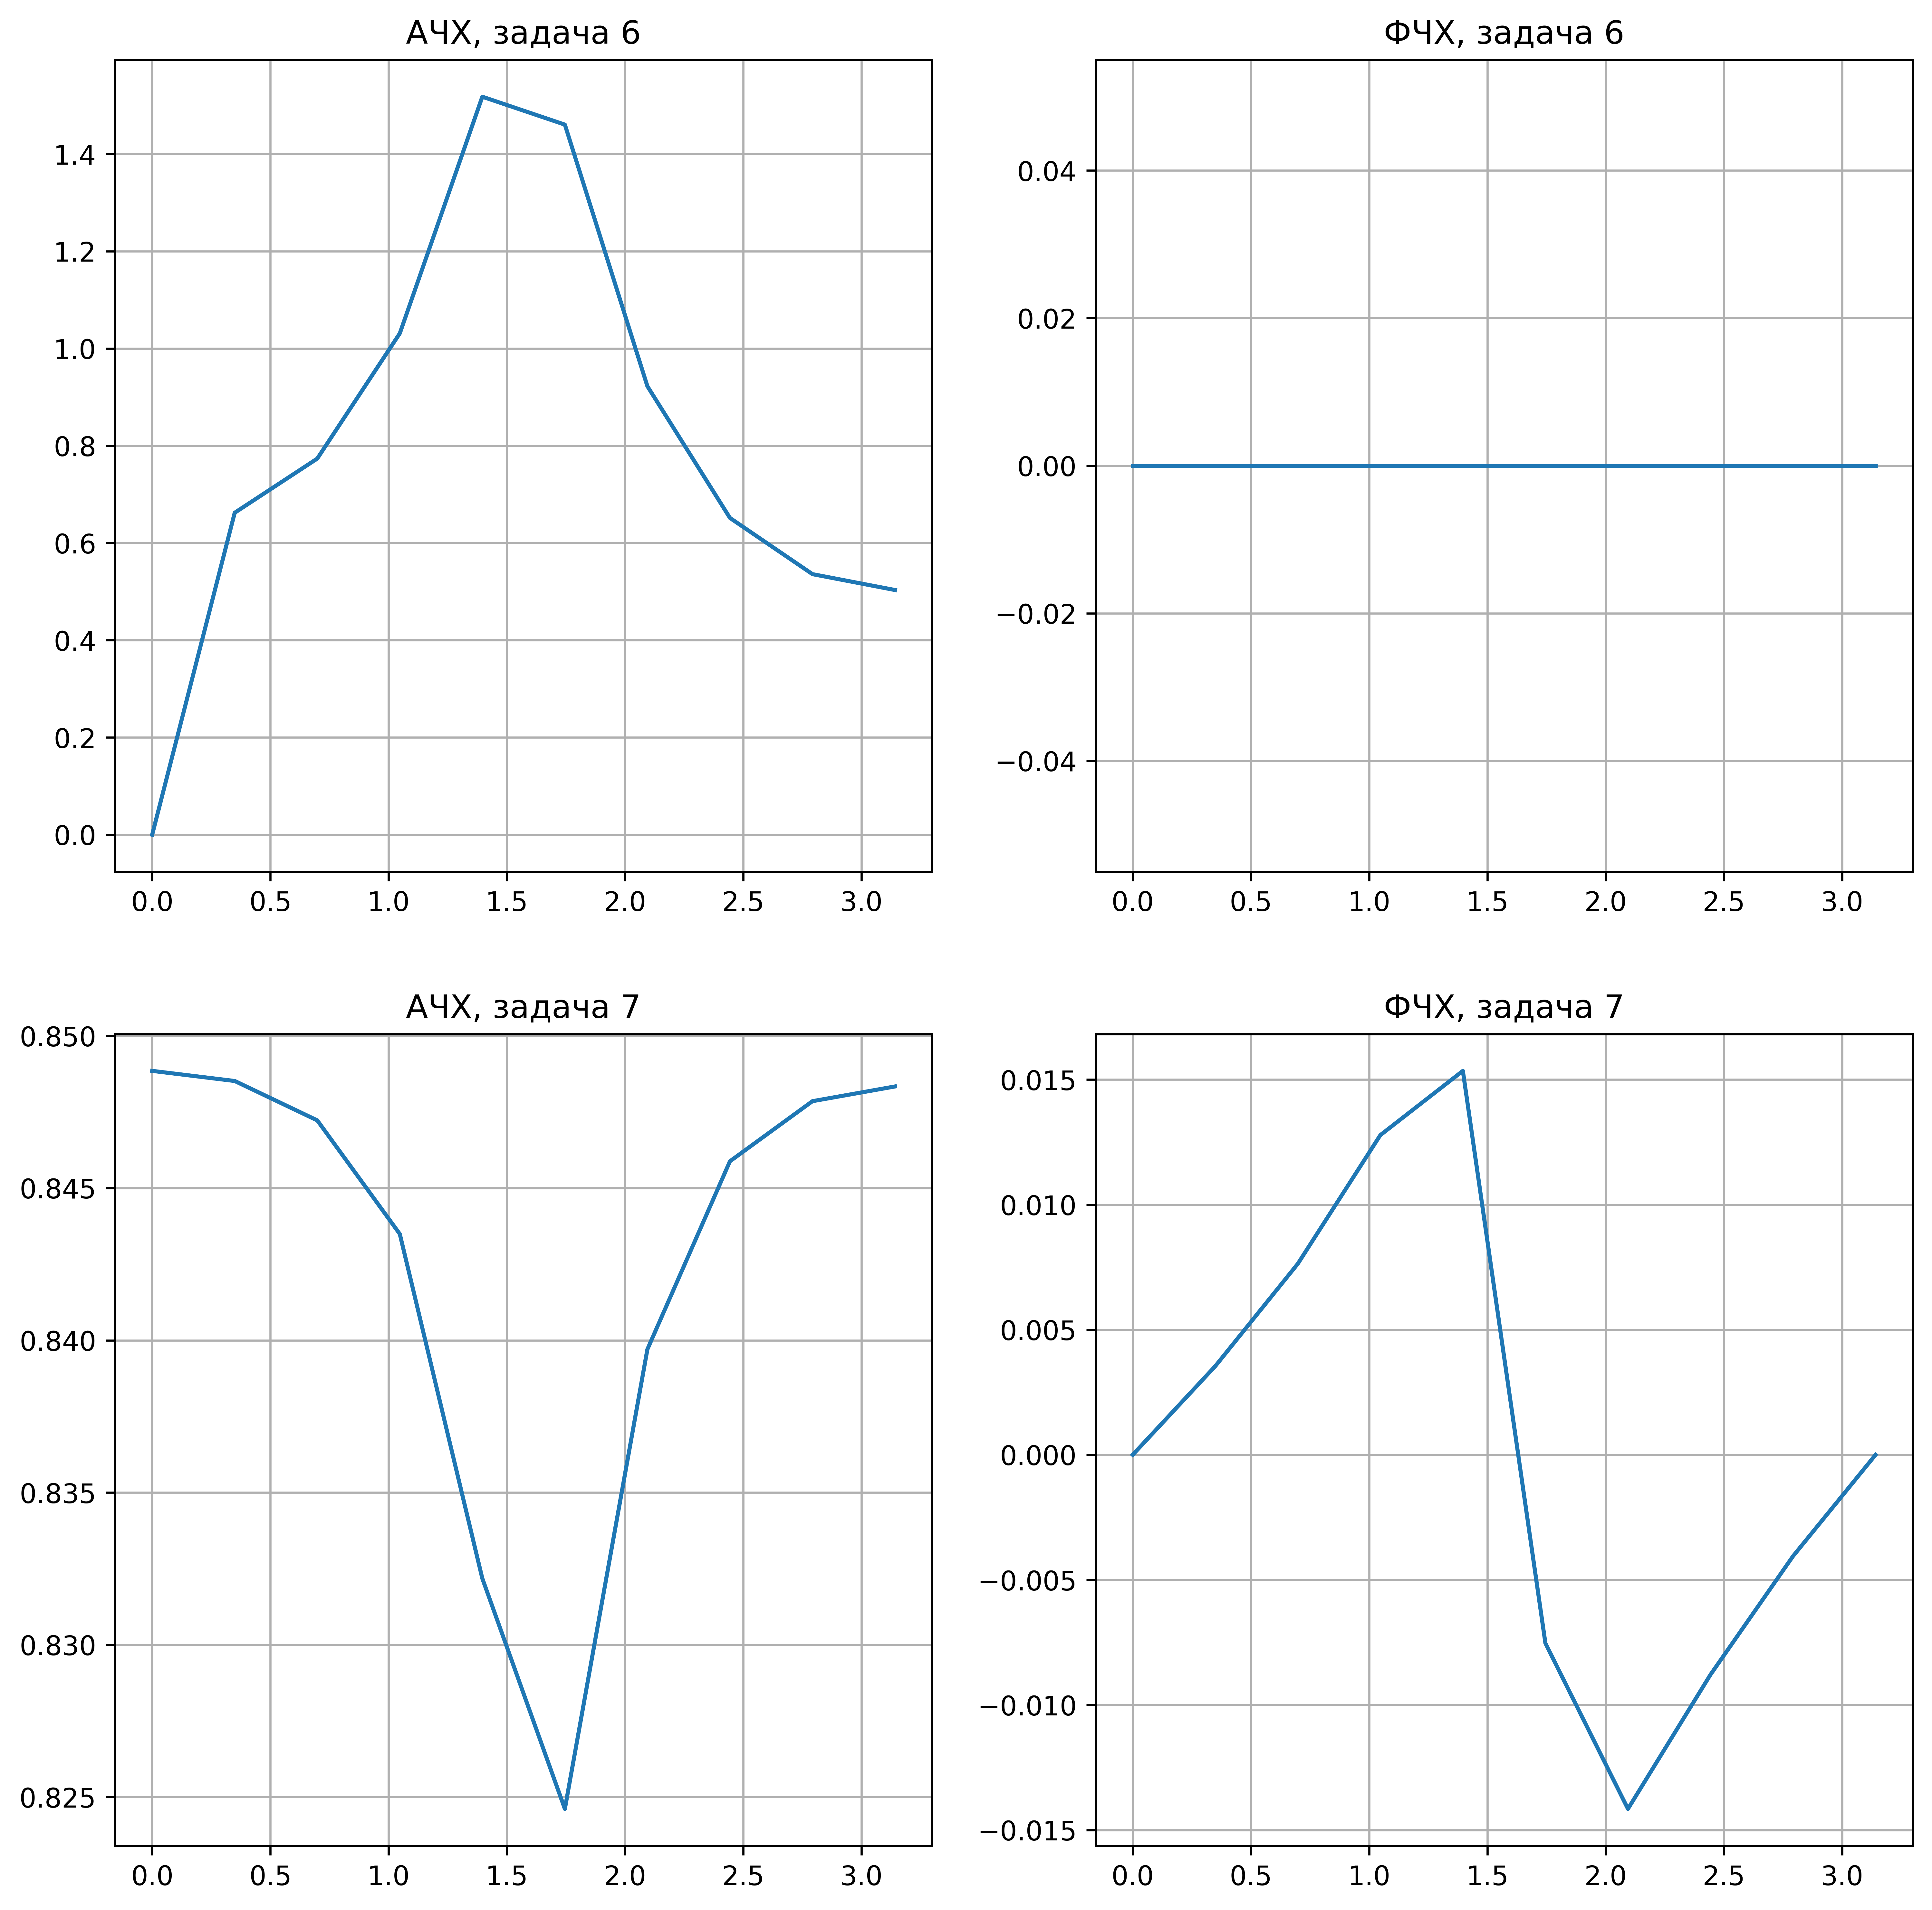

In [197]:
plt.figure(figsize=(12.0, 12.0), dpi=600)
plt.subplot(2, 2, 1)
plt.plot(w, y_6_abs)
plt.grid()
plt.title('АЧХ, задача 6')
plt.subplot(2, 2, 2)
plt.plot(w, y_6_angle)
plt.grid()
plt.title('ФЧХ, задача 6')
plt.subplot(2, 2, 3)
plt.plot(w, y_7_abs[1])
plt.grid()
plt.title('АЧХ, задача 7')
plt.subplot(2, 2, 4)
plt.plot(w, y_7_angle[1])
plt.grid()
plt.title('ФЧХ, задача 7')
pylab.savefig('achh_phchh.png', dpi = 600)
plt.show()

# Задание 8
Алгоритм Карплуса–Стронга для имитации звука гитарной струны. Рассмотрим разностное уравнение:
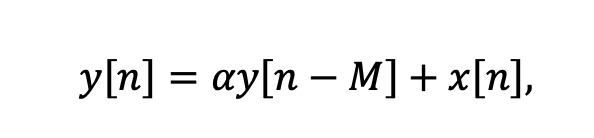

Напишите в Matlabфункцию y=ks_synthesis(x, alpha, P),которая ге-
нерирует выходную последовательность согласно разностному уравнению
(2.15), длина выходной последовательности равна 𝑀×𝑃, где 𝑀 – длина после-
довательности 𝑥.

In [2]:
def ks_synthesis(x, alpha, P):
    M = len(x)
    y_len = M * P
    y = np.zeros(y_len)
    for n in range:
        if ((n - M) >= 1):
            y[n] = alpha * y[n - M]
        if (n < M):
            y[n] += x[n]
    return y